In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob
from astropy.io import fits

In [3]:
figsize(8,6)

In [4]:
from __future__ import unicode_literals

figsize(8, 6)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 24
rcParams['legend.borderaxespad'] = 1

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

In [5]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p.T, hits.T, ra_bins, dec_bins

In [6]:
def get_data(bank='A', session=5):
    fnames = glob.glob('/data2/GBT/S140/Daisy/*/*_0'+str(session)+'_*'+bank+'*.rfireduced_new.npz')
    fnames.sort()
    calibrations = np.load('/home/mabitbol/GBT-S140/calibrations/calibration_3C295_0'+str(session)+'_'+bank+'.npy').item()
    fdiode = calibrations['freqs']
    pdiode = calibrations['pdiode']
    pdiode1 = calibrations['pdiode1']
    meanpower = 0.5 * (pdiode + pdiode1)
    calibrated = [] 
    ras = []
    decs = []
    azs = []
    els = []
    raw = []
    for fname in fnames:
        nz = np.load(fname)
        ra = nz['sra']
        dec = nz['sdec']
        mask = nz['valid']
        az = nz['AZIMUTH'][::8]
        el = nz['ELEVATIO'][::8]
        freqs = nz['freqs']
            
        gain = meanpower / ( nz['xxon'] - nz['xxoff'])
        calibd = nz['xxoff'] * gain
        
        mask[:200] = False
        mask[400:] = False
    
        calibd = calibd[:, mask]

        calibrated = np.concatenate([calibrated, np.nanmean(calibd - np.nanmedian(calibd,0), 1)])
        raw = np.concatenate([raw, np.nanmean(calibd, 1)])
        ras = np.concatenate([ras, ra])
        decs = np.concatenate([decs, dec])
        azs = np.concatenate([azs, az])
        els = np.concatenate([els, el])
    return raw, calibrated, ras, decs, azs, els

In [7]:
raw, calib, ras, decs, azs, els = get_data('A')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: Mean of empty slice
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: Mean of empty slice


In [8]:
decs[:10000].min()

62.035467730577054

In [9]:
decs[:10000].max()

64.842540652573319

In [10]:
ras[:10000].min()

332.74752704566572

In [11]:
ras[:10000].max()

338.95021219399911

In [12]:
rc = 337.5
dc = 62.25
t = np.arange(1000)
beam = 2.75 / 60.
x = rc - beam * np.cos(2. * pi * t / 1000)
y = dc - beam * np.sin(2. * pi * t / 1000)

Text(0,0.5,u'degrees per second')

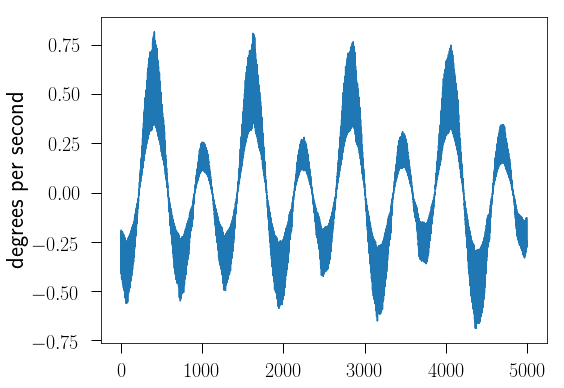

In [13]:
plot(np.diff(ras[:5000])*25.)
ylabel('degrees per second')

In [14]:
np.max(np.diff(ras[:5000])*25.) * 60.

49.012855610470751

In [15]:
np.max(np.diff(decs[:5000])*25.) * 60.

19.386869079621505

In [16]:
np.max(np.diff(azs[:5000])*25.) * 60.

21.643000578924543

In [17]:
np.max(np.diff(els[:5000])*25.) * 60.

21.618388311788195

In [18]:
np.std(np.diff(azs[:5000])*25.) * 60.

9.4598939749725002

In [19]:
np.mean(np.abs(np.diff(azs[:5000])*25.)) * 60.

7.9113356733347349

In [20]:
np.std(np.diff(els[:5000])*25.) * 60.

9.4579595675632557

Text(0,0.5,u'degrees per second')

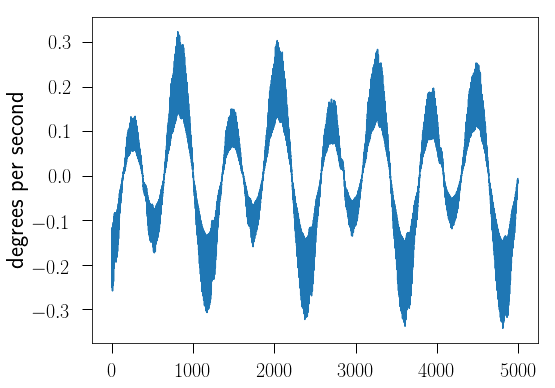

In [21]:
plot(np.diff(decs[:5000])*25.)
ylabel('degrees per second')

In [22]:
339./360. * 24.

22.6

In [23]:
0.6 * 60

36.0

In [24]:
5 * 60 * 25

7500

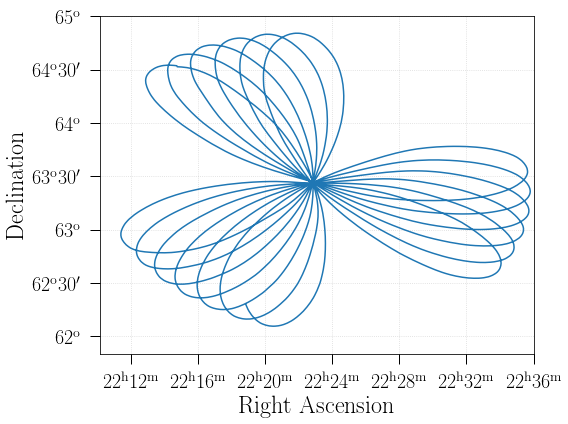

In [25]:
plot(ras[:7500], decs[:7500])
grid(ls='dotted', alpha=0.5)
ylim(decs[:10000].min()-0.2, 65)
xlim(ras[:10000].min()-0.2, 339)
xlabel('$\mathrm{Right\ Ascension}$')
ylabel('$\mathrm{Declination}$')
xticks([333, 334, 335, 336, 337, 338, 339], ['$\mathrm{22^h12^m}$', '$\mathrm{22^h16^m}$', '$\mathrm{22^h20^m}$', \
                                             '$\mathrm{22^h24^m}$', '$\mathrm{22^h28^m}$', \
                                            '$\mathrm{22^h32^m}$', '$\mathrm{22^h36^m}$'])
yticks([62, 62.5, 63, 63.5, 64, 64.5, 65], ['$\mathrm{62^o}$', '$\mathrm{62^o30\'}$', '$\mathrm{63^o}$',\
                                            '$\mathrm{63^o30\'}$', '$\mathrm{64^o}$', \
                                            '$\mathrm{64^o30\'}$', '$\mathrm{65^o}$'])
tight_layout()
savefig('daisyscan.pdf', format='pdf')

In [143]:
k = 1
speed = np.sqrt(np.diff(azs[:1500:k])**2 + np.diff(els[:1500:k])**2)

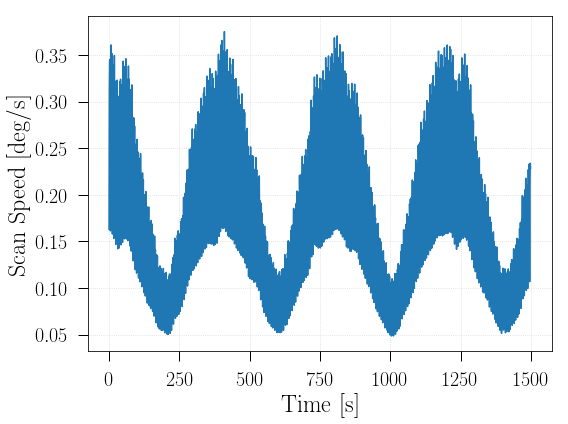

In [144]:
plot(speed*25.)
grid(ls='dotted', alpha=0.5)
ylabel('$\mathrm{Scan\ Speed\ [deg/s]}$')
xlabel('$\mathrm{Time\ [s]}$')
tight_layout()
#savefig('scanspeed.pdf', format='pdf')